In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [2]:
from google.colab import files
uploaded = files.upload()

Saving ev_adoption_dataset.csv to ev_adoption_dataset.csv


In [3]:
df = pd.read_csv("ev_adoption_dataset.csv")
df.head()

,country,year,total_vehicles_registered,ev_vehicles_registered,ev_percentage_share,charging_stations_count,avg_cost_ev,avg_cost_gasoline_vehicle,gov_incentive_amount,co2_emissions_per_vehicle,fuel_price_per_liter,electricity_price_per_kWh
0,United States,2015,19942603,46048,0.23,8524,36696.32,31047.07,9935,108.69,1.31,0.11
1,United States,2016,20341455,48523,0.24,9376,36559.14,27580.33,1434,156.12,1.66,0.24
2,United States,2017,20748284,53879,0.26,10314,42585.59,26738.14,5557,180.94,0.81,0.26
3,United States,2018,21163249,63042,0.30,11345,50944.18,25103.76,3547,121.53,1.72,0.12
4,United States,2019,21586514,77728,0.36,12479,41397.82,25384.69,6635,160.37,1.77,0.25


In [5]:
X = df[['year',
        'total_vehicles_registered',
        'charging_stations_count',
        'avg_cost_ev',
        'avg_cost_gasoline_vehicle',
        'gov_incentive_amount',
        'co2_emissions_per_vehicle',
        'fuel_price_per_liter',
        'electricity_price_per_kWh']] # Corrected column name

y = df['ev_vehicles_registered']

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
from sklearn.neural_network import MLPRegressor

model = MLPRegressor(
    hidden_layer_sizes=(256, 128, 64),
    activation='relu',
    solver='adam',
    learning_rate_init=0.001,
    max_iter=8000,
    early_stopping=True,
    random_state=42
)

model.fit(X_train_scaled, y_train)

MLPRegressor(early_stopping=True, hidden_layer_sizes=(256, 128, 64),
             max_iter=8000, random_state=42)

In [10]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

y_pred = model.predict(X_test_scaled)

print("Model Evaluation Results")
print("-------------------------")
print("R2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

Model Evaluation Results
-------------------------
R2 Score: -0.07194010545097229
MAE: 968252589.8086382
MSE: 1.3969368815229526e+19


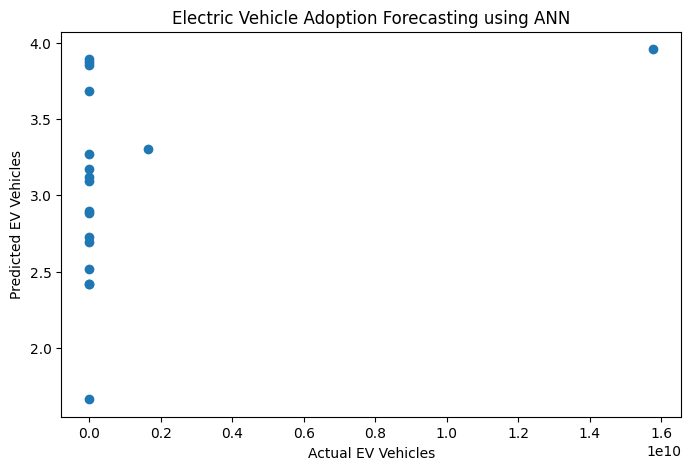

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual EV Vehicles")
plt.ylabel("Predicted EV Vehicles")
plt.title("Electric Vehicle Adoption Forecasting using ANN")
plt.show()

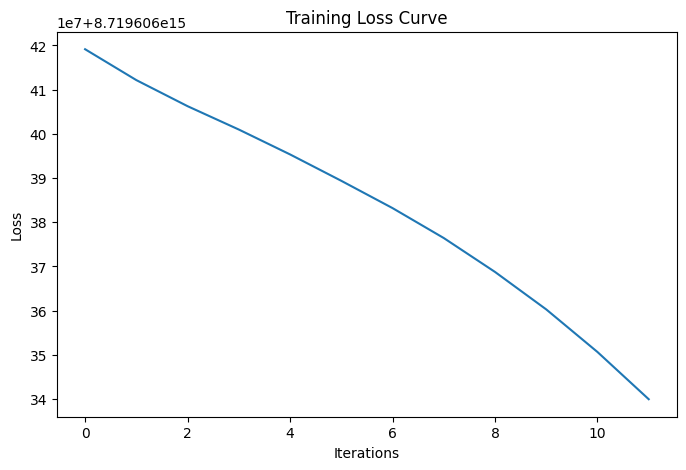

In [12]:
plt.figure(figsize=(8,5))
plt.plot(model.loss_curve_)
plt.title("Training Loss Curve")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()

In [13]:
future_input = [[2025, 25000000, 20000, 35000, 30000, 5000, 120, 1.5, 0.2]]

future_scaled = scaler.transform(future_input)
prediction = model.predict(future_scaled)

print("Predicted EV Adoption:", int(prediction[0]))

Predicted EV Adoption: 3


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [14]:
import joblib

joblib.dump(model, "ann_model.pkl")
joblib.dump(scaler, "scaler.pkl")

print("Model saved successfully!")

Model saved successfully!


In [15]:
!pip install streamlit
!pip install pyngrok

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 89.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 128.2 MB/s eta 0:00:00


In [16]:
%%writefile app.py
import streamlit as st
import joblib
import numpy as np

# Load model and scaler
model = joblib.load("ann_model.pkl")
scaler = joblib.load("scaler.pkl")

st.title("Electric Vehicle Adoption Forecasting")
st.write("Deep Learning-Based Artificial Neural Network (ANN)")

st.subheader("Enter Future Year Details")

year = st.number_input("Year", min_value=2024, max_value=2050, value=2025)
total_vehicles = st.number_input("Total Vehicles Registered", value=25000000)
charging = st.number_input("Charging Stations Count", value=20000)
avg_cost_ev = st.number_input("Average Cost of EV", value=35000)
avg_cost_gas = st.number_input("Average Cost of Gasoline Vehicle", value=30000)
gov_incentive = st.number_input("Government Incentive Amount", value=5000)
co2 = st.number_input("CO2 Emissions per Vehicle", value=120.0)
fuel_price = st.number_input("Fuel Price per Liter", value=1.5)
electricity_price = st.number_input("Electricity Price per kWh", value=0.2)

if st.button("Predict EV Adoption"):
    input_data = [[year, total_vehicles, charging, avg_cost_ev,
                   avg_cost_gas, gov_incentive,
                   co2, fuel_price, electricity_price]]

    input_scaled = scaler.transform(input_data)
    prediction = model.predict(input_scaled)

    st.success(f"Predicted EV Adoption: {int(prediction[0])}")

Writing app.py


In [22]:
from google.colab import files

files.download("app.py")
files.download("ann_model.pkl")
files.download("scaler.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>